# Planet-homework4week3-Zhanglulu-1701110221

拟合参数:
eccentricity of Mars   : 0.077 
period of Mars         : 687.142 d
orbital radius of Mars : 1.563  AU
period of Earth        : 365.510 d
initial phase of Mars  : 0.404 


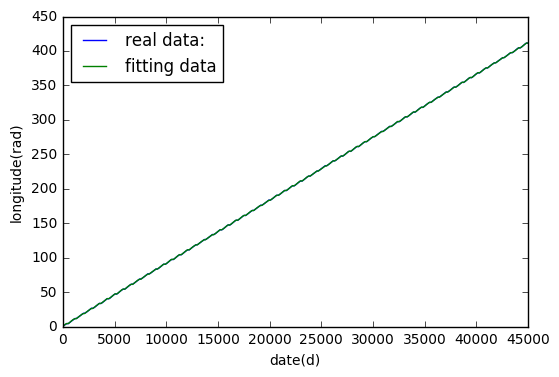

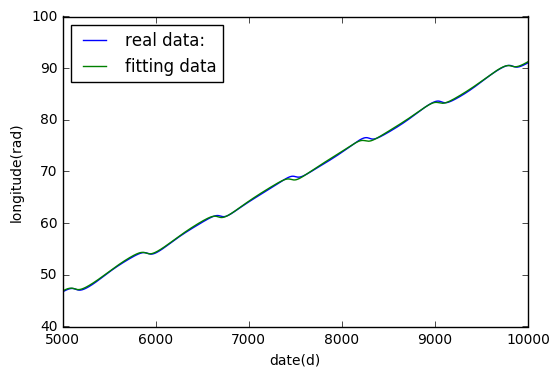

In [19]:
import numpy as np
from astropy.io import ascii
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

#define the function to make the fitting angle result accumulative as the way in observed data
def normal1(angle):
    for i in range(0,len(angle)-1):
        if(angle[i] - angle[i+1] >6):
            angle[i+1:] = angle[i+1:] + 2*np.pi
    return angle

def normal2(angle):
    for i in range(0,len(angle)-1):
        if(angle[i+1] - angle[i] >6):
            angle[i+1:] = angle[i+1:] - 2*np.pi
    return angle

#difine the function to simulate the Mars's motion on the sky 
def func(x,p):
    eM, PM, RP, PE, wM = p
    xE = np.cos((2*np.pi*t/PE))
    yE = np.sin((2*np.pi*t/PE))
    xM = RP*(np.cos((2*np.pi*t/PM)+eM*np.sin(2*np.pi*t/PM)+wM) - eM)
    yM = RP*(np.sin((2*np.pi*t/PM)+eM*np.sin(2*np.pi*t/PM)+wM)*np.sqrt(1-eM**2))
    return np.arctan2( yE + yM, xE + xM)

#the residual function for leastsqare fitting
def residuals(p, y, x):
    return y-normal2(normal1(func(x, p)))

#read the data
Mars = ascii.read('c:/users/a/desktop/planet/Mars.txt')
t = Mars['col1']

#set the initial parameters of leastsqare fitting then execute the fitting and output the fitting result
p0 = [0.0934, 686.97, 1.5, 365.256, 0] #ini para
plsq = leastsq(residuals, p0, args=(Mars['col2'],t))
print (u"拟合参数:")
print('eccentricity of Mars   : %-6.3f'%plsq[0][0])
print('period of Mars         : %-6.3f d'%plsq[0][1])
print('orbital radius of Mars : %-6.3f AU'%plsq[0][2])
print('period of Earth        : %-6.3f d'%plsq[0][3])
print('initial phase of Mars  : %-6.3f'%plsq[0][4])

#plot the fitting result of Mars's motion on the sky
plt.clf()
plt.plot(t, Mars['col2'], label="real data:")
plt.plot(t, normal2(normal1(func(t, plsq[0]))), label="fitting data")
plt.xlabel('date(d)')
plt.ylabel('longitude(rad)')
plt.legend(loc=2)
plt.figure()
plt.plot(t[5000:10000], Mars['col2'][5000:10000], label="real data:")
plt.plot(t[5000:10000], normal2(normal1(func(t, plsq[0])))[5000:10000], label="fitting data")
plt.xlabel('date(d)')
plt.ylabel('longitude(rad)')
plt.legend(loc=2)

plt.show()